# Proyek Analisis Sentimen
- **Nama:** Audy Nadira Ramadanti
- **Email:** audynadiraramdanti@gmail.com
- **ID Dicoding:** audy_nadira_ramadanti_zWZ9

In [40]:
!pip install sastrawi
!pip install wordcloud
!pip install nlp-id
!pip install pyspellchecker
!pip install pandas scikit-learn gensim nltk
!pip install tqdm
!pip install ipywidgets

Pada proses ini, saya menginstal serangkaian library tambahan yang diperlukan untuk mendukung analisis data dan pemrosesan bahasa, terutama dalam konteks pengolahan teks dalam bahasa Indonesia. Proses dimulai dengan perintah *!pip install sastrawi* yang berfungsi untuk mengunduh dan memasang Sastrawi, library yang populer untuk stemming bahasa Indonesia. Selanjutnya, *!pip install wordcloud* menginstal library WordCloud yang membantu dalam visualisasi data teks melalui pembuatan awan kata, sehingga memudahkan dalam menganalisis frekuensi kata dari kumpulan data teks. Perintah berikutnya, *!pip install nlp-id*, memasang modul pemrosesan bahasa alami (NLP) khusus untuk bahasa Indonesia, yang berguna untuk tugas-tugas seperti tokenisasi dan analisis sintaksis. Selanjutnya, perintah *!pip install pyspellchecker* dipakai untuk menginstal PySpellChecker, sebuah library untuk pemeriksaan ejaan yang membantu meningkatkan akurasi data teks. 

Pada baris berikutnya, *!pip install pandas scikit-learn gensim nltk* menginstal beberapa library kunci sekaligus: *pandas* digunakan untuk manipulasi data berbentuk tabel (DataFrame), *scikit-learn* untuk tugas-tugas machine learning dan pemodelan, *gensim* untuk topik modeling dan representasi vektor kata, serta *nltk* yang menyediakan berbagai alat untuk analisis bahasa alami. Selanjutnya, *!pip install tqdm* diinstal untuk menghadirkan progress bar yang memudahkan pelacakan proses eksekusi kode yang memakan waktu. Terakhir, perintah *!pip install ipywidgets* memasang library ipywidgets yang memungkinkan penggunaan widget interaktif dalam Jupyter Notebook, sehingga interaksi dengan data dan visualisasi menjadi lebih dinamis. Secara keseluruhan, serangkaian instalasi ini memastikan bahwa seluruh komponen yang diperlukan untuk analisis teks dan penerapan metode NLP serta machine learning siap digunakan dalam lingkungan pengembangan Python saya.

In [41]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from sklearn.metrics import accuracy_score
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('stopwords')
from nlp_id.lemmatizer import Lemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from spellchecker import SpellChecker
from sklearn.model_selection import train_test_split
from tqdm import tqdm
tqdm.pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FX506\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pada proses ini, sejumlah library Python diimpor untuk menyiapkan lingkungan yang komprehensif guna melakukan manipulasi data, analisis numerik, visualisasi, serta pengolahan bahasa alami (NLP) khususnya untuk bahasa Indonesia. Pertama, library *pandas* dan *numpy* dimuat untuk memudahkan manipulasi data tabel dan perhitungan numerik, dimana *pandas* memungkinkan analisis data yang fleksibel dan *numpy* menyediakan operasi matematis yang cepat, dengan seed yang diatur untuk memastikan reproduktibilitas hasil. Selanjutnya, *matplotlib* dan *seaborn* digunakan untuk membuat visualisasi data, di mana *seaborn* memberikan pengaturan visualisasi statistik yang lebih menarik. Modul-modul lain seperti *datetime*, *re*, dan *string* membantu dalam pengolahan data waktu, penggunaan ekspresi reguler, dan pengelolaan konstanta teks seperti tanda baca. Untuk memproses teks, fungsi tokenisasi dan daftar stopwords dari *nltk* disiapkan setelah melakukan pengunduhan kata-kata berhenti, sementara *Sastrawi* menyediakan alat untuk stemming dan penghilangan kata berhenti yang spesifik untuk bahasa Indonesia. Visualisasi teks lebih lanjut dilakukan dengan *WordCloud* yang menghasilkan awan kata dari kumpulan data teks. Selain itu, untuk memperkaya analisis NLP, library dari *nlp_id* digunakan untuk proses lemmatization, dan beberapa teknik representasi teks (CountVectorizer, TfidfVectorizer) serta model pembelajaran mesin (Word2Vec, RandomForestClassifier, MultinomialNB, LinearSVC) diimpor guna melakukan ekstraksi fitur dan klasifikasi teks. Di akhir pengaturan, *SpellChecker* dimanfaatkan untuk memperbaiki ejaan dan *train_test_split* dari *scikit-learn* disiapkan untuk membagi data ke dalam set pelatihan dan pengujian. Dengan rangkaian impor ini, seluruh komponen penting untuk analisis data dan pemrosesan teks telah disiapkan dalam lingkungan Python, sehingga memungkinkan analisis data yang mendalam dan terstruktur.

In [42]:
data = pd.read_csv("data/codm_reviews.csv")

data.shape

(298199, 11)

Pada proses ini, data ulasan yang sebelumnya telah disimpan dalam format CSV dibaca dan dimuat kembali ke dalam struktur DataFrame menggunakan fungsi read_csv dari pustaka pandas. File CSV tersebut berada di dalam direktori data dengan nama codm_reviews.csv. Dengan membaca file ini, seluruh isi CSV—yang terdiri dari baris dan kolom—dikonversi menjadi bentuk DataFrame, sehingga data menjadi lebih terstruktur dan siap untuk dianalisis atau dimanipulasi lebih lanjut menggunakan berbagai fungsi yang disediakan oleh pandas.

Setelah data berhasil dimuat, fungsi data.shape digunakan untuk mengetahui dimensi dari DataFrame tersebut. Nilai yang dikembalikan berupa tuple (280199, 11), yang menunjukkan bahwa dataset terdiri dari 280.199 baris dan 11 kolom. Setiap baris mewakili satu entri atau satu ulasan pengguna, sementara setiap kolom merepresentasikan atribut atau informasi terkait ulasan tersebut, seperti tanggal, rating, komentar, dan sebagainya.

Ukuran dataset yang cukup besar ini menunjukkan bahwa analisis yang akan dilakukan dapat bersifat komprehensif dan memberikan hasil yang lebih representatif, namun juga memerlukan perhatian terhadap efisiensi dalam pengolahan data agar tidak memengaruhi performa saat menjalankan analisis lebih lanjut.

## Pre-Processing Data

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298199 entries, 0 to 298198
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              298199 non-null  object
 1   userName              298198 non-null  object
 2   userImage             298199 non-null  object
 3   content               298199 non-null  object
 4   score                 298199 non-null  int64 
 5   thumbsUpCount         298199 non-null  int64 
 6   reviewCreatedVersion  172675 non-null  object
 7   at                    298199 non-null  object
 8   replyContent          5630 non-null    object
 9   repliedAt             5630 non-null    object
 10  appVersion            172675 non-null  object
dtypes: int64(2), object(9)
memory usage: 25.0+ MB


Setelah data berhasil dimuat ke dalam DataFrame, fungsi data.info() digunakan untuk menampilkan informasi umum mengenai struktur dataset. Output dari fungsi ini memberikan gambaran penting terkait jumlah entri, nama kolom, jumlah nilai non-null (tidak kosong) pada masing-masing kolom, tipe data, serta estimasi penggunaan memori oleh DataFrame.

Berdasarkan hasil data.info(), dapat diketahui bahwa dataset memiliki total 280.199 entri atau baris, dengan 11 kolom yang menyimpan berbagai informasi terkait ulasan pengguna. Berikut adalah beberapa poin penting dari hasil ini:

1. Kolom dan Tipe Data:

    - Terdapat 9 kolom bertipe objek (umumnya berisi data berupa teks atau tanggal yang belum diparsing), dan 2 kolom bertipe integer (int64), yaitu score dan thumbsUpCount, yang menyimpan nilai numerik.

2. Nilai yang Hilang (Missing Values):

    - Sebagian besar kolom memiliki data lengkap (tidak ada nilai null), seperti reviewId, userImage, content, score, dan thumbsUpCount.
    Namun, terdapat kolom yang memiliki nilai kosong (missing), seperti:
        - userName: 1 entri kosong.
        - reviewCreatedVersion dan appVersion: hanya memiliki sekitar 163.036 entri yang terisi dari total 280.199 (artinya terdapat sekitar 117.163 nilai kosong).
        - replyContent dan repliedAt: hanya sekitar 5.609 entri yang terisi, menunjukkan bahwa hanya sebagian kecil ulasan yang mendapatkan balasan dari pengelola aplikasi.

3. Ukuran Memori:

    - DataFrame ini menggunakan memori sekitar 23.5 MB, yang tergolong cukup ringan untuk dataset dengan ratusan ribu baris, namun tetap perlu diperhatikan saat melakukan manipulasi skala besar atau menjalankan analisis kompleks.

Secara keseluruhan, informasi ini sangat penting sebagai langkah awal dalam eksplorasi data (EDA), karena membantu dalam mengidentifikasi apakah perlu dilakukan pembersihan data (data cleaning), seperti penanganan nilai kosong, konversi tipe data, atau normalisasi informasi sebelum melanjutkan ke tahap analisis yang lebih dalam.

In [44]:
data = data.dropna(axis=1)

Pada tahap ini, dilakukan proses pembersihan data untuk menghilangkan kolom-kolom yang mengandung nilai kosong (missing values) secara keseluruhan. Fungsi dropna() dari pustaka pandas digunakan untuk tujuan ini, dengan parameter axis=1 yang menunjukkan bahwa operasi penghapusan dilakukan berdasarkan kolom, bukan baris.

Secara lebih spesifik, perintah data = data.dropna(axis=1) akan menghapus semua kolom dalam DataFrame yang memiliki setidaknya satu nilai kosong (NaN). Artinya, hanya kolom-kolom yang 100% lengkap (tidak memiliki nilai yang hilang) yang akan dipertahankan dalam DataFrame akhir.

Dalam konteks dataset ini, kolom-kolom seperti reviewCreatedVersion, replyContent, repliedAt, appVersion, dan userName akan terhapus karena masing-masing mengandung sejumlah nilai kosong. Hasil akhirnya adalah DataFrame yang hanya terdiri dari kolom-kolom yang datanya utuh secara penuh.

Langkah ini sering digunakan untuk menyederhanakan analisis awal dan menghindari potensi error akibat keberadaan data yang tidak lengkap. Namun, perlu diperhatikan bahwa pendekatan ini juga berisiko menghilangkan informasi yang sebenarnya penting, sehingga sebaiknya digunakan secara selektif tergantung pada tujuan analisis yang akan dilakukan

In [45]:
# Menghapus baris duplikat dari DataFrame clean_df
data = data.drop_duplicates()
 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298199 entries, 0 to 298198
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   reviewId       298199 non-null  object
 1   userImage      298199 non-null  object
 2   content        298199 non-null  object
 3   score          298199 non-null  int64 
 4   thumbsUpCount  298199 non-null  int64 
 5   at             298199 non-null  object
dtypes: int64(2), object(4)
memory usage: 13.7+ MB


Setelah proses penghapusan kolom yang memiliki nilai kosong, langkah selanjutnya adalah melakukan **pembersihan data ganda (duplikat)** dengan menggunakan fungsi `drop_duplicates()`. Fungsi ini bertujuan untuk menghapus **baris-baris yang memiliki data identik di semua kolom**, sehingga setiap entri dalam DataFrame menjadi unik.

Perintah `data = data.drop_duplicates()` secara otomatis mendeteksi dan menghapus baris yang sepenuhnya sama dengan baris lain dalam DataFrame. Ini merupakan langkah penting dalam tahap praproses data karena adanya entri duplikat dapat menyebabkan bias dalam analisis, terutama jika digunakan dalam perhitungan statistik atau pelatihan model machine learning.

Namun, berdasarkan hasil `data.info()`, diketahui bahwa jumlah entri tetap **280.199 baris**, yang berarti **tidak ada baris duplikat** yang terdeteksi dan dihapus oleh fungsi ini. Dengan kata lain, seluruh baris dalam DataFrame tersebut unik setelah kolom-kolom dengan nilai kosong dihapus sebelumnya.

Hasil akhir DataFrame terdiri dari **6 kolom**, yaitu:
1. `reviewId` – ID unik untuk masing-masing ulasan.
2. `userImage` – URL atau referensi gambar profil pengguna.
3. `content` – Isi atau teks ulasan dari pengguna.
4. `score` – Nilai rating yang diberikan (biasanya dalam skala 1–5).
5. `thumbsUpCount` – Jumlah tanda suka (like) pada ulasan.
6. `at` – Tanggal dan waktu saat ulasan dibuat.

Ukuran memori yang digunakan pun menjadi lebih ringan, yaitu sekitar **12.8 MB**, karena jumlah kolom berkurang dan data telah dibersihkan dari potensi redundansi.Langkah ini membantu memastikan bahwa data siap untuk dianalisis lebih lanjut tanpa terganggu oleh entri yang tidak relevan atau berulang.

In [46]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text


Dalam proses analisis teks, data yang bersumber dari ulasan pengguna biasanya mengandung banyak unsur yang tidak relevan atau tidak konsisten, seperti tanda baca, angka, simbol, bahkan bahasa campuran. Untuk itu, dilakukan beberapa tahapan pembersihan (preprocessing) guna mengubah teks mentah menjadi bentuk yang lebih bersih dan siap dianalisis. Berikut adalah penjelasan dari fungsi-fungsi preprocessing yang digunakan:

### 1. `cleaningText(text)`
Fungsi ini digunakan untuk membersihkan teks dari elemen-elemen yang tidak diperlukan. Proses yang dilakukan meliputi:
- Menghapus **mention** (kata yang diawali `@`).
- Menghapus **hashtag** (kata yang diawali `#`).
- Menghapus teks **"RT "** yang sering muncul dalam retweet.
- Menghapus **tautan/link** (yang diawali dengan `http`).
- Menghapus **angka**.
- Menghapus **karakter non-alfanumerik** (tanda baca dan simbol).
- Mengganti karakter baris baru (`\n`) dengan spasi.
- Menghapus semua tanda baca dengan `translate`.
- Menghapus spasi di awal dan akhir teks.

In [47]:
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

### 2. `casefoldingText(text)`
Fungsi ini mengubah seluruh huruf dalam teks menjadi **huruf kecil**. Tujuannya adalah untuk menyeragamkan bentuk kata sehingga analisis tidak terpengaruh oleh perbedaan kapitalisasi.


In [48]:
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text


### 3. `tokenizingText(text)`
Fungsi ini memecah kalimat atau teks panjang menjadi daftar kata-kata (**token**), yang nantinya akan diproses lebih lanjut. Tokenisasi penting untuk menganalisis kata per kata dalam teks.

In [49]:
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "nggak", "ngga"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 


### 4. `filteringText(text)`
Fungsi ini digunakan untuk menghapus **stopwords**, yaitu kata-kata umum yang biasanya tidak membawa makna penting dalam analisis (contoh: "dan", "yang", "di").  
- Menggabungkan stopwords dari dua bahasa: **Indonesia dan Inggris**.
- Menambahkan daftar kata tidak penting tambahan yang sering muncul dalam ulasan, seperti "yaa", "gak", "nggak", "woi", dll.
- Hanya menyisakan kata-kata bermakna yang nantinya dapat digunakan dalam analisis sentimen atau topik.

In [50]:
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 


### 5. `stemmingText(text)`
Fungsi ini melakukan proses **stemming**, yaitu mengubah kata menjadi bentuk dasarnya (misalnya: "bermain" → "main").  
- Menggunakan pustaka `Sastrawi`, khusus untuk bahasa Indonesia.
- Teks dipecah menjadi kata-kata, kemudian setiap kata dikembalikan ke akar katanya.
- Setelah stemming, kata-kata digabungkan kembali menjadi sebuah string.

In [51]:
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence



### 6. `toSentence(list_words)`
Fungsi ini digunakan untuk menggabungkan kembali daftar kata-kata hasil proses tokenisasi, filtering, atau stemming menjadi sebuah kalimat atau string tunggal.

In [52]:
lemmatizer = Lemmatizer()

def lemmatizeText(text):
    lemmatized = lemmatizer.lemmatize(text)
    return lemmatized

### 7. `lemmatizeText(text)`
Fungsi ini menerapkan proses **lemmatisasi**, yang mirip dengan stemming namun mempertimbangkan konteks linguistik agar kata dikembalikan ke bentuk dasar yang benar secara gramatikal.  
- Menggunakan objek `Lemmatizer()` (kemungkinan dari library `nlp-id` atau sejenisnya).
- Dapat digunakan sebagai pelengkap stemming untuk meningkatkan akurasi dalam NLP.

In [53]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "gk": "ga", "yg": "yang", "cod": "call of duty", "codm": "cll of duty mobile", "mvp": "most valuable player", "mp": "multi player", "gw" : "saya", "lu":"kamu"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

Fungsi ini bertujuan untuk menangani slang words atau kata-kata tidak baku dan singkatan yang sering digunakan dalam percakapan informal, khususnya dalam ulasan pengguna aplikasi atau media sosial.

Seringkali, pengguna menulis ulasan dengan menggunakan singkatan, istilah gaul, atau akronim seperti "wtb", "bgt", "cod", atau "gw". Jika tidak ditangani, kata-kata ini dapat mengganggu proses analisis teks karena tidak dikenali sebagai kata formal yang memiliki makna jelas

In [54]:
spell = SpellChecker()
cache = {}

def correct_typo(text):
    words = text.split()
    corrected = []

    for word in words:
        if word in cache:
            corrected.append(cache[word])
        else:
            if word not in spell:
                suggestion = spell.correction(word)
                corrected_word = suggestion if suggestion else word
            else:
                corrected_word = word
            cache[word] = corrected_word
            corrected.append(corrected_word)
    
    return ' '.join(corrected)


Fungsi ini bertujuan untuk memperbaiki kesalahan penulisan (typo) dalam teks ulasan yang sering muncul akibat ketidaksengajaan atau gaya penulisan informal dari pengguna.

Kesalahan ejaan dapat memengaruhi efektivitas analisis teks, seperti klasifikasi kata, pencocokan token, dan hasil stemming. Oleh karena itu, fungsi ini menggunakan pustaka pyspellchecker melalui objek SpellChecker() untuk mengidentifikasi dan memperbaiki kata-kata yang tidak dikenali sebagai kata yang valid.

In [55]:
# 1. Bersihkan teks
data['text_clean'] = data['content'].apply(cleaningText)

Untuk mempersiapkan data teks sebelum dilakukan analisis lebih lanjut seperti *sentiment analysis*, dilakukan serangkaian tahapan *preprocessing* terhadap kolom `content` yang berisi teks ulasan. Tahapan-tahapan ini dilakukan secara bertahap dan terstruktur untuk menghasilkan teks yang bersih, seragam, dan bermakna. Berikut adalah tahapan lengkapnya:

Langkah awal ini bertujuan untuk menghapus elemen-elemen yang tidak relevan dari teks, seperti mention, hashtag, tautan, angka, tanda baca, serta karakter-karakter khusus lainnya. Hasilnya adalah teks dalam bentuk yang lebih bersih dan netral.


In [56]:
# 2. Case folding (huruf kecil)
data['text_casefoldingText'] = data['text_clean'].apply(casefoldingText)

Teks dibakukan ke dalam huruf kecil seluruhnya untuk menghindari perbedaan makna akibat kapitalisasi huruf, misalnya "Main" dan "main" akan dianggap sama.


In [57]:
# 3. Normalisasi kata slang
data['text_slangwords'] = data['text_casefoldingText'].apply(fix_slangwords)

Pada tahap ini, kata-kata gaul atau tidak baku seperti “wtb”, “gw”, “bgt”, dll. diubah ke bentuk formal sesuai dengan kamus slang yang telah didefinisikan sebelumnya. Tujuannya agar kata-kata tersebut dapat dikenali dalam proses linguistik selanjutnya.

In [58]:
# 4. Koreksi typo
data['text_spellcorrect'] = data['text_slangwords'].progress_apply(correct_typo)

 27%|██▋       | 80339/298199 [6:39:14<18:02:40,  3.35it/s] 


KeyboardInterrupt: 

Langkah ini memperbaiki ejaan yang salah atau typo pada setiap kata menggunakan pustaka spell checker. Proses ini memperbaiki kata-kata tidak valid menjadi kata yang paling mungkin dimaksudkan oleh pengguna.

In [ ]:
# 5. Tokenisasi
data['text_tokenizingText'] = data['text_spellcorrect'].apply(tokenizingText)

Teks kemudian dipisahkan menjadi daftar kata individual (token), sehingga setiap kata dapat dianalisis dan dimanipulasi secara terpisah.

In [ ]:
# 6. Stopword removal
data['text_stopword'] = data['text_tokenizingText'].apply(filteringText)

Stopwords atau kata-kata umum yang tidak memiliki nilai semantik penting seperti “yang”, “dan”, “itu” dihapus dari daftar token untuk menyisakan kata-kata yang lebih bermakna.

In [ ]:
# 7. Lemmatization
data['text_lemmatized'] = data['text_stopword'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

Setiap kata dalam token hasil sebelumnya dikembalikan ke bentuk dasarnya (lemma) dengan mempertimbangkan konteks linguistik. Misalnya: "berlari", "berlari-lari", "lari-lari" → "lari".

In [ ]:
# 8. Gabung ke kalimat akhir
data['final_text'] = data['text_lemmatized'].apply(toSentence)

Langkah terakhir ini mengubah kembali daftar kata hasil lemmatization menjadi satu kalimat bersih yang siap untuk dianalisis, disimpan, atau digunakan dalam model machine learning.


### **Hasil Akhir**
Kolom `final_text` kini berisi teks ulasan dalam bentuk yang telah sepenuhnya diproses dan bersih, ideal untuk digunakan dalam tahap analisis berikutnya seperti klasifikasi sentimen, clustering, atau pembuatan word cloud.

In [ ]:
data.head()

,reviewId,userImage,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_lemmatized,final_text
0,aa8fbba1-cee7-45d5-aab6-9ea4eb24921f,https://play-lh.googleusercontent.com/EGemoI2N...,"Bintang 1 alasan: game sering Force close, cep...",1,51,2025-04-04 20:32:45,Bintang alasan game sering Force close cepat ...,bintang alasan game sering force close cepat ...,bintang alasan game sering force close cepat p...,"[bintang, alasan, game, sering, force, close, ...","[bintang, alasan, game, force, close, cepat, p...","[bintang, alas, game, force, close, cepat, pan...",bintang alas game force close cepat panas fram...
1,04b5ffc1-434a-4190-aba7-00d04093f399,https://play-lh.googleusercontent.com/EGemoI2N...,Dulu 2023 dan 2024 match nya seimbang dan game...,1,501,2025-03-15 18:44:09,Dulu dan match nya seimbang dan gamenya cuku...,dulu dan match nya seimbang dan gamenya cuku...,dulu dan match nya seimbang dan gamenya cukup ...,"[dulu, dan, match, nya, seimbang, dan, gamenya...","[match, seimbang, gamenya, responsif, match, s...","[match, imbang, gamenya, responsif, match, imb...",match imbang gamenya responsif match imbang re...
2,5b3b0345-7e3c-49cb-b066-050b621133b4,https://play-lh.googleusercontent.com/EGemoI2N...,"saya player old, tahun berapa gitu saya nyoba ...",1,8,2025-03-28 15:21:29,saya player old tahun berapa gitu saya nyoba m...,saya player old tahun berapa gitu saya nyoba m...,saya player old tahun berapa gitu saya nyoba m...,"[saya, player, old, tahun, berapa, gitu, saya,...","[player, old, gitu, nyoba, main, call, duty, d...","[player, old, gitu, nyoba, main, call, duty, d...",player old gitu nyoba main call duty download ...
3,904e6e63-6160-47fa-944c-53978ccd816d,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong masalah sinyal atau jaringan di match M...,1,31,2025-03-17 20:56:56,Tolong masalah sinyal atau jaringan di match M...,tolong masalah sinyal atau jaringan di match m...,tolong masalah sinyal atau jaringan di match m...,"[tolong, masalah, sinyal, atau, jaringan, di, ...","[tolong, sinyal, jaringan, match, multi, playe...","[tolong, sinyal, jaring, match, multi, player,...",tolong sinyal jaring match multi player baik t...
4,46b3d76a-6ca6-4f5f-9580-5f8a7e6fe3dd,https://play-lh.googleusercontent.com/EGemoI2N...,Bug dari jaman majapahit masih blom di benerin...,1,370,2025-02-28 18:09:19,Bug dari jaman majapahit masih blom di benerin...,bug dari jaman majapahit masih blom di benerin...,bug dari jaman majapahit masih blom di benerin...,"[bug, dari, jaman, majapahit, masih, blom, di,...","[bug, jaman, majapahit, blom, benerin, dsync, ...","[bug, jaman, majapahit, blom, benerin, dsync, ...",bug jaman majapahit blom benerin dsync parah t...


Langkah ini saya gunakan untuk menampilkan lima baris pertama dari data ulasan yang telah diproses. Proses ini bertujuan untuk memberikan gambaran awal mengenai isi data setelah melalui serangkaian tahapan pembersihan dan transformasi teks.

Melalui tampilan ini, kita dapat melihat bagaimana setiap ulasan pengguna telah mengalami proses normalisasi, mulai dari pembersihan teks, konversi ke huruf kecil, penggantian kata slang, koreksi typo, hingga proses tokenisasi, penghapusan stopwords, dan lemmatization. Hasil akhir dari seluruh proses ini ditampilkan dalam kolom final_text, yang berisi versi bersih dan siap analisis dari masing-masing ulasan.

Dengan melihat sampel data awal ini, kita juga dapat mengevaluasi apakah tahapan preprocessing telah berjalan sesuai harapan sebelum melanjutkan ke tahap analisis selanjutnya seperti klasifikasi sentimen atau visualisasi teks.

In [ ]:
def label_sentiment(score):
    if score <= 2:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    else: 
        return 'Positif'

# Terapkan ke data kamu
data['sentiment'] = data['score'].apply(label_sentiment)

data.head()

,reviewId,userImage,content,score,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,sentiment
0,aa8fbba1-cee7-45d5-aab6-9ea4eb24921f,https://play-lh.googleusercontent.com/EGemoI2N...,"Bintang 1 alasan: game sering Force close, cep...",1,51,2025-04-04 20:32:45,Bintang alasan game sering Force close cepat ...,bintang alasan game sering force close cepat ...,bintang alasan game sering force close cepat p...,Negatif
1,04b5ffc1-434a-4190-aba7-00d04093f399,https://play-lh.googleusercontent.com/EGemoI2N...,Dulu 2023 dan 2024 match nya seimbang dan game...,1,501,2025-03-15 18:44:09,Dulu dan match nya seimbang dan gamenya cuku...,dulu dan match nya seimbang dan gamenya cuku...,dulu dan match nya seimbang dan gamenya cukup ...,Negatif
2,5b3b0345-7e3c-49cb-b066-050b621133b4,https://play-lh.googleusercontent.com/EGemoI2N...,"saya player old, tahun berapa gitu saya nyoba ...",1,8,2025-03-28 15:21:29,saya player old tahun berapa gitu saya nyoba m...,saya player old tahun berapa gitu saya nyoba m...,saya player old tahun berapa gitu saya nyoba m...,Negatif
3,904e6e63-6160-47fa-944c-53978ccd816d,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong masalah sinyal atau jaringan di match M...,1,31,2025-03-17 20:56:56,Tolong masalah sinyal atau jaringan di match M...,tolong masalah sinyal atau jaringan di match m...,tolong masalah sinyal atau jaringan di match m...,Negatif
4,46b3d76a-6ca6-4f5f-9580-5f8a7e6fe3dd,https://play-lh.googleusercontent.com/EGemoI2N...,Bug dari jaman majapahit masih blom di benerin...,1,370,2025-02-28 18:09:19,Bug dari jaman majapahit masih blom di benerin...,bug dari jaman majapahit masih blom di benerin...,bug dari jaman majapahit masih blom di benerin...,Negatif


Selanjutnya, proses ini merupakan proses pelabelan sentimen berdasarkan nilai skor yang diberikan oleh pengguna pada ulasannya. Setiap ulasan pada dataset memiliki atribut score yang berkisar dari 1 hingga 5. Skor ini kemudian dikategorikan ke dalam tiga kelas sentimen utama, yaitu:

Negatif: untuk skor 1 dan 2, yang menunjukkan ketidakpuasan pengguna terhadap aplikasi.

Netral: untuk skor 3, yang menunjukkan ulasan bersifat biasa saja, tidak terlalu puas maupun tidak puas.

Positif: untuk skor 4 dan 5, yang menunjukkan kepuasan pengguna terhadap aplikasi.

Hasil dari proses ini disimpan dalam kolom baru bernama sentiment, yang nantinya dapat digunakan sebagai label untuk keperluan analisis sentimen, pelatihan model klasifikasi, atau visualisasi distribusi opini pengguna terhadap aplikasi.

Langkah ini penting karena mengubah skor numerik menjadi kategori yang bermakna secara emosional, sehingga lebih mudah untuk ditafsirkan dan dianalisis.

In [ ]:
# Menghitung jumlah masing-masing sentimen
sentiment_counts = data['sentiment'].value_counts()

# Cetak hasilnya
print("Jumlah Positif:", sentiment_counts.get('Positif', 0))
print("Jumlah Netral :", sentiment_counts.get('Netral', 0))
print("Jumlah Negatif:", sentiment_counts.get('Negatif', 0))


Jumlah Positif: 154931
Jumlah Netral : 29409
Jumlah Negatif: 95859


Proses selanjutnya yaitu, saya menghitung jumlah ulasan berdasarkan kategori sentimen yang telah ditentukan sebelumnya, yaitu Positif, Netral, dan Negatif. Setelah setiap ulasan diberi label sentimen berdasarkan skor penilaian pengguna, proses ini dilakukan untuk mengetahui sebaran opini pengguna terhadap aplikasi.

Dengan menggunakan fungsi value_counts(), kita dapat melihat berapa banyak ulasan yang termasuk dalam masing-masing kategori sentimen. Hasil ini memberikan gambaran umum mengenai tingkat kepuasan pengguna, serta menjadi dasar dalam melakukan analisis lebih lanjut atau visualisasi data.

Berdasarkan hasil perhitungan:

    - Jumlah ulasan positif sebanyak 154.931, menunjukkan sebagian besar pengguna merasa puas dengan aplikasi.

    - Jumlah ulasan netral sebanyak 29.409, menunjukkan opini yang cenderung netral atau biasa saja.

    - Jumlah ulasan negatif sebanyak 95.859, menandakan masih banyak pengguna yang memberikan ulasan dengan nada tidak puas.

Informasi ini sangat penting untuk melihat bagaimana persepsi pengguna secara keseluruhan terhadap aplikasi, serta untuk mengidentifikasi potensi masalah atau kekuatan dari aplikasi berdasarkan data ulasan.

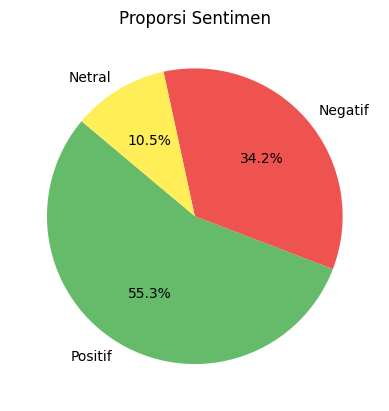

In [ ]:
data['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#66bb6a', '#ef5350', '#ffee58'],  # Pastikan urutan warnanya cocok juga
    labels=data['sentiment'].value_counts().index
)
plt.title('Proporsi Sentimen')
plt.ylabel('')
plt.show()


Selanjutnya saya **menyajikan distribusi kategori sentimen dalam bentuk visual pie chart**, yang bertujuan untuk memberikan gambaran yang lebih intuitif mengenai persebaran opini pengguna terhadap aplikasi.

Dalam visualisasi ini, setiap bagian dari pie chart merepresentasikan **persentase ulasan dalam satu kategori sentimen** — *Positif*, *Netral*, atau *Negatif*. Prosentase ditampilkan secara langsung di dalam grafik agar memudahkan interpretasi. Warna juga digunakan untuk membedakan masing-masing kategori:
- **Hijau** untuk sentimen *Positif* (menunjukkan kepuasan),
- **Merah** untuk *Negatif* (menandakan ketidakpuasan),
- **Kuning** untuk *Netral* (opini yang bersifat netral atau tidak condong ke salah satu sisi).

Berdasarkan hasil visualisasi:
- Ulasan **positif** mendominasi dengan **55.3%**,
- Diikuti oleh ulasan **negatif** sebanyak **34.2%**,
- Dan **netral** sebesar **10.5%**.

Visualisasi ini memperkuat pemahaman terhadap hasil analisis sentimen sebelumnya dan dapat dijadikan sebagai bahan presentasi atau pelaporan untuk menunjukkan persepsi publik terhadap aplikasi secara keseluruhan.

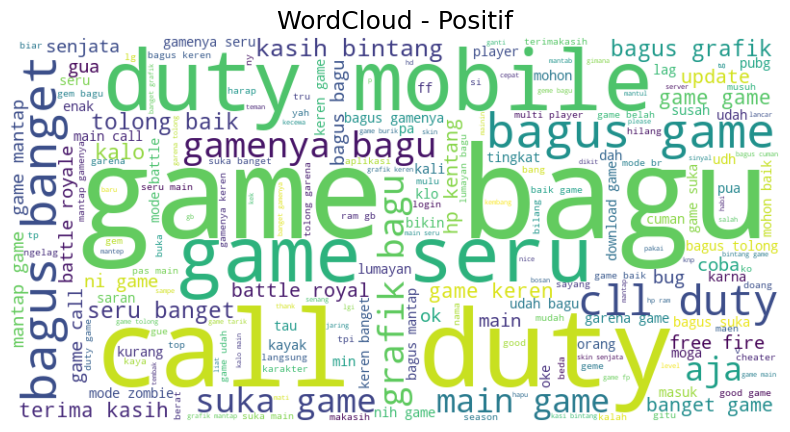

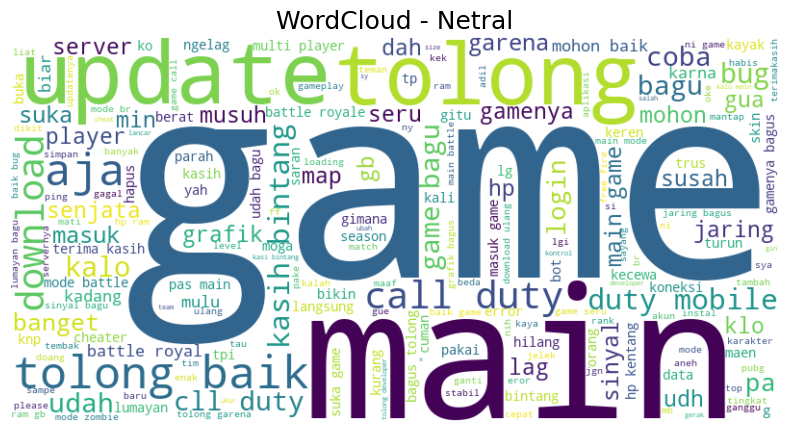

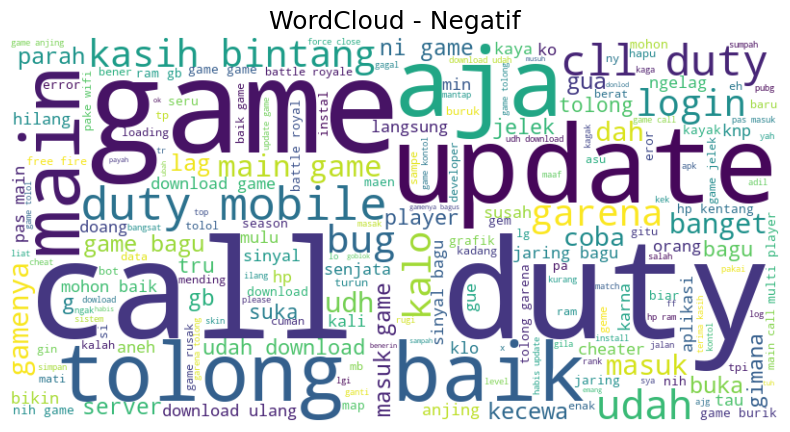

In [ ]:
# Buat fungsi untuk generate WordCloud per label
def generate_wordcloud(label):
    text = ' '.join(data[data['sentiment'] == label]['final_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {label}", fontsize=18)
    plt.show()

# Generate wordcloud untuk masing-masing sentimen
for label in ['Positif', 'Netral', 'Negatif']:
    generate_wordcloud(label)


Terakhir saya **membuat visualisasi WordCloud berdasarkan kategori sentimen ulasan**, yaitu *Positif*, *Netral*, dan *Negatif*. Proses ini bertujuan untuk mengetahui **kata-kata yang paling sering muncul dalam ulasan dari masing-masing kelompok sentimen**, yang dapat memberikan wawasan mendalam mengenai isi opini pengguna.

Pada tahap ini, data ulasan yang sudah melalui tahap pembersihan dan normalisasi (tersimpan di kolom `final_text`) digabungkan menjadi satu string besar untuk setiap kategori sentimen. Kemudian, digunakan library `WordCloud` untuk menghasilkan representasi visual dari frekuensi kata—semakin sering sebuah kata muncul dalam ulasan, maka ukurannya akan tampak semakin besar di visualisasi.

Visualisasi WordCloud ini dibuat untuk tiga kategori:
- **Positif**: Menampilkan kata-kata yang sering digunakan oleh pengguna yang memberikan ulasan baik.
- **Netral**: Menampilkan kata-kata umum yang tidak terlalu bernada positif atau negatif.
- **Negatif**: Memperlihatkan kata-kata yang dominan dalam ulasan negatif, yang sering kali menunjukkan masalah atau keluhan.

Melalui visualisasi ini, kita bisa **mengidentifikasi topik utama, persepsi pengguna, serta potensi masalah atau kekuatan dari aplikasi berdasarkan kata-kata yang paling dominan digunakan**.

## Ekstraksi Fitur

In [ ]:
X = data['final_text']           # Teks akhir yang sudah dibersihkan
X_token = data['text_lemmatized']  # List of token
y = data['sentiment']            # Label sentimen

Masuk kedalam ekstraksi fitur, saya **memisahkan fitur (X) dan label (y) dari data yang telah dibersihkan**, sebagai bagian dari persiapan menuju tahap analisis lebih lanjut seperti klasifikasi sentimen.

- **`X`** berisi data teks akhir (`final_text`) yang telah melalui seluruh tahapan preprocessing seperti pembersihan, normalisasi, koreksi typo, tokenisasi, penghapusan stopwords, lemmatization, dan penggabungan kembali ke bentuk kalimat. Teks ini digunakan sebagai **input utama** dalam proses pelatihan model.
  
- **`X_token`** adalah versi token dari data `X`, yaitu berupa daftar kata yang telah diproses dan dilemmatize, namun belum digabungkan menjadi kalimat. Ini bisa digunakan untuk analisis berbasis token, seperti perhitungan frekuensi kata atau pembuatan vektor dengan pendekatan berbasis token (contoh: Word2Vec atau TF-IDF berbasis token list).
  
- **`y`** adalah label target berupa kategori sentimen (*Positif*, *Netral*, atau *Negatif*) yang digunakan sebagai **output atau target** dalam proses supervised learning seperti klasifikasi sentimen.

Langkah ini penting karena merupakan **awal dari tahap pemodelan machine learning atau NLP**, di mana data harus dipisahkan dengan jelas antara fitur dan target sebelum dilakukan pelatihan model.

In [ ]:
# --- 1. BoW ---
bow = CountVectorizer(max_features=200)
X_bow = bow.fit_transform(X)
X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

Ekstraksi fitur pertama yang saya gunakan ialah  **Bag of Words (BoW)**. Pendekatan ini penting karena **model machine learning tidak dapat memahami teks dalam bentuk mentah**, sehingga diperlukan representasi numerik yang merepresentasikan informasi dari teks tersebut.

Prosesnya sebagai berikut:

- **`CountVectorizer`** digunakan untuk membentuk representasi BoW, yaitu dengan menghitung frekuensi kemunculan kata dalam dokumen. Di sini, hanya **200 kata paling sering muncul (berdasarkan `max_features=200`)** yang dipertahankan sebagai fitur. Ini dilakukan untuk **mengurangi kompleksitas dan memfokuskan pada kata-kata yang paling informatif**.
  
- Kemudian hasil transformasi disimpan dalam variabel `X_bow`, yang berisi representasi vektor dari masing-masing teks ulasan.

- Setelah data vektor diperoleh, dilakukan proses **pembagian data menjadi data latih dan data uji** menggunakan `train_test_split`. Sebanyak **80% data digunakan untuk pelatihan model**, dan **20% sisanya digunakan untuk menguji performa model**. Proses ini penting untuk **mengukur kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya**.

In [ ]:
# --- 2. TF-IDF ---
tfidf = TfidfVectorizer(max_features=200, min_df=5, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



Selanjutnya saya membuat juga ekstraksi fitur dengan menggunakan  metode **TF-IDF**, yaitu sebuah teknik representasi teks yang mempertimbangkan **pentingnya sebuah kata dalam dokumen tertentu dibandingkan dengan seluruh dokumen dalam kumpulan data**.

Berikut detail prosesnya:

- **`TfidfVectorizer`** digunakan untuk mengonversi teks menjadi vektor TF-IDF, di mana setiap angka pada vektor merepresentasikan skor pentingnya sebuah kata di suatu dokumen.  
- Saya membatasi jumlah fitur maksimal hanya **200 kata paling relevan** (`max_features=200`) untuk menjaga efisiensi komputasi.
- Kata yang terlalu jarang muncul di dokumen (kurang dari 5 dokumen, `min_df=5`) diabaikan karena dianggap kurang informatif.
- Begitu juga kata yang terlalu sering muncul di sebagian besar dokumen (lebih dari 80%, `max_df=0.8`) juga dihapus karena kemungkinan besar kata tersebut tidak memberikan makna khusus (*kata umum* seperti "aplikasi", "game", dll).
  
Setelah semua teks dikonversi menjadi bentuk vektor, data disimpan dalam `X_tfidf`, dan kemudian dibagi menjadi **data latih dan data uji** menggunakan `train_test_split`, dengan komposisi 80% untuk pelatihan model dan 20% untuk pengujian performa.

In [ ]:
# --- 3. Word2Vec ---
model_w2v = Word2Vec(sentences=X_token, vector_size=100, window=5, min_count=1, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in model_w2v.wv]
    return np.mean(model_w2v.wv[doc], axis=0) if doc else np.zeros(model_w2v.vector_size)

X_w2v = np.array([document_vector(doc) for doc in X_token])
X_w2v_train, X_w2v_test, y_w2v_train, y_w2v_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

## Modeling Data

In [ ]:
# RANDOM FOREST
print("===== RANDOM FOREST =====")
rf = RandomForestClassifier()

rf.fit(X_bow_train, y_bow_train)
print(f"BoW     | Train: {rf.score(X_bow_train, y_bow_train):.4f} | Test: {rf.score(X_bow_test, y_bow_test):.4f}")

rf.fit(X_tfidf_train, y_tfidf_train)
print(f"TF-IDF  | Train: {rf.score(X_tfidf_train, y_tfidf_train):.4f} | Test: {rf.score(X_tfidf_test, y_tfidf_test):.4f}")

rf.fit(X_w2v_train, y_w2v_train)
print(f"W2V     | Train: {rf.score(X_w2v_train, y_w2v_train):.4f} | Test: {rf.score(X_w2v_test, y_w2v_test):.4f}")

===== RANDOM FOREST =====
BoW     | Train: 0.8498 | Test: 0.6794
TF-IDF  | Train: 0.8493 | Test: 0.6870
W2V     | Train: 0.9554 | Test: 0.7169


In [ ]:
# SVM
print("\n===== SVM =====")
svm = LinearSVC()

svm.fit(X_bow_train, y_bow_train)
print(f"BoW     | Train: {svm.score(X_bow_train, y_bow_train):.4f} | Test: {svm.score(X_bow_test, y_bow_test):.4f}")

svm.fit(X_tfidf_train, y_tfidf_train)
print(f"TF-IDF  | Train: {svm.score(X_tfidf_train, y_tfidf_train):.4f} | Test: {svm.score(X_tfidf_test, y_tfidf_test):.4f}")

svm.fit(X_w2v_train, y_w2v_train)
print(f"W2V     | Train: {svm.score(X_w2v_train, y_w2v_train):.4f} | Test: {svm.score(X_w2v_test, y_w2v_test):.4f}")


===== SVM =====
BoW     | Train: 0.6879 | Test: 0.6894
TF-IDF  | Train: 0.6882 | Test: 0.6897
W2V     | Train: 0.7028 | Test: 0.7050


In [ ]:
# NAIVE BAYES
print("\n===== NAIVE BAYES =====")
nb = MultinomialNB()

nb.fit(X_bow_train, y_bow_train)
print(f"BoW     | Train: {nb.score(X_bow_train, y_bow_train):.4f} | Test: {nb.score(X_bow_test, y_bow_test):.4f}")

nb.fit(X_tfidf_train, y_tfidf_train)
print(f"TF-IDF  | Train: {nb.score(X_tfidf_train, y_tfidf_train):.4f} | Test: {nb.score(X_tfidf_test, y_tfidf_test):.4f}")


===== NAIVE BAYES =====
BoW     | Train: 0.6762 | Test: 0.6776
TF-IDF  | Train: 0.6848 | Test: 0.6866


ValueError: Negative values in data passed to MultinomialNB (input X)